### Librerias

In [61]:
import pandas as pd  
import os
import numpy as np
import datetime as dt # para gestión de fechas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from datetime import datetime
import locale
from scipy import stats
import re

### Importar módulos creados por nosotros

In [2]:
import funciones as fn #funciones es el nombre del script dnd hemos creado las funciones
#from funciones import * 
#from scripts.librerias import *

### Carga de datos

In [3]:
path_dataset = 'D:\\Desktop\\Reto06\\datosOriginales\\' # ruta donde se encuentran los datos
file = 'EDERJAKIN_LA_Datos_2021.xlsm'
fichero = pd.ExcelFile(path_dataset + file)
nombres_hojas = fichero.sheet_names

In [4]:
# leer todas las hojas
todo  = pd.read_excel(os.path.join(path_dataset,file), sheet_name = nombres_hojas)

# separar
for i in todo.keys():
    globals()['%s' % i.replace(" ", "_").lower()] = todo[i]

# Limpieza 

## DATA CLEANING

### ELIMINACION DE VARIABLES Y FILAS QUE NO DAN INFORMACION

In [5]:
acceso_1ero_ultimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mdl_user_id    372 non-null    int64 
 1   1er acceso     372 non-null    object
 2   ultimo acceso  372 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.8+ KB


In [6]:
#Usuarios
fn.eliminar_columnas(usuarios, 'last_access') #mas tarde imputaremos esta columna junto al primer acceso que estan en df accesos_1ero_ultimo

In [7]:
#Tutores_perfil
#fn.eliminar_columnas(tutores_perfil, '')

In [8]:
#Conocimientos
fn.eliminar_columnas(conocimientos, ['color', 'description', 'referencia']) #quitamos color y description ya que no aportan info y tienen pocos valores 


In [9]:
#Cursos
fn.eliminar_columnas(cursos, ['summary', 'sortorder']) #quitamos summary ya que con la informacion de course_name es suficiente, y sortorder porque no aporta info necesaria

In [10]:
#Itinerarios
fn.eliminar_columnas(itinearios, ['remarks']) #esta vacia y no aporta informacion

In [11]:
#Accesos
accesos.groupby('description').size() #quitamos los accesos que fueron ERROR, ya que no son errores validos
accesos['description']= accesos[accesos['description'] != 'Login SRM ERROR 1']

In [12]:
#Acceso_1ero_ultimo
fn.eliminar_dias(df= acceso_1ero_ultimo , columna= '1er acceso') #convertimos las fechas de texto a numerico, primero eliminando el dia de la semana
fn.eliminar_dias(df= acceso_1ero_ultimo , columna= 'ultimo acceso')

In [13]:
locale.setlocale(locale.LC_ALL, 'esp_esp') #cambiamos el idioma

'Spanish_Spain.1252'

In [14]:
fn.fecha_texto(acceso_1ero_ultimo, '1er acceso')
fn.fecha_texto(acceso_1ero_ultimo, 'ultimo acceso') #PORQUE LA FUNCION NO FUNCIONA??

NameError: name 'datetime' is not defined

In [15]:
for index, value in enumerate(acceso_1ero_ultimo['1er acceso']):
    if value != '--':
        acceso_1ero_ultimo.loc[index, '1er acceso']=datetime.strptime(value, '%d de %B de %Y, %H:%M')
    else:
         acceso_1ero_ultimo.loc[index, '1er acceso'] = None

In [16]:
for index, value in enumerate(acceso_1ero_ultimo['ultimo acceso']):
    if value != '--':
        acceso_1ero_ultimo.loc[index, 'ultimo acceso']=datetime.strptime(value, '%d de %B de %Y, %H:%M')
    else: 
        acceso_1ero_ultimo.loc[index, 'ultimo acceso'] = None #covertimos -- a valores vacios


### CORRECCION DEL TIPO DE LAS VARIABLES

In [17]:
#usuarios:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           420 non-null    int64  
 1   useranonimo_name  420 non-null    object 
 2   active_flag       420 non-null    int64  
 3   language          420 non-null    object 
 4   mdl_user_id       405 non-null    float64
 5   role_admin        420 non-null    int64  
 6   role_manager      420 non-null    int64  
 7   role_student      420 non-null    int64  
 8   role_tutor        420 non-null    int64  
 9   planta_name       420 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 32.9+ KB


In [18]:
fn.corregir_tipo(df = usuarios, columnas = [ 'user_id', 'language', 'planta_name'], tipo = 'category') #las pasamos a tipo category
fn.corregir_tipo(df = usuarios, columnas = ['active_flag',  'role_admin','role_manager','role_student','role_tutor'], tipo = 'bool') #a tipo bool
fn.corregir_tipo(df = usuarios, columnas = [ 'mdl_user_id'], tipo = 'object')

In [19]:
#quitamos columnas Unnamed:
fn.eliminar_unnamed(usuarios)
usuarios.head() #correcto

,user_id,useranonimo_name,active_flag,language,mdl_user_id,role_admin,role_manager,role_student,role_tutor,planta_name
0,3,username_03,True,es,13,False,False,True,False,ABP Bergara
1,4,username_04,True,es,14,False,False,True,False,Fagorederlan
2,5,username_05,True,es,15,False,False,True,False,ABP Arrasate
3,6,username_06,True,es,17,False,False,True,False,Fagorederlan
4,7,username_07,True,es,18,False,False,True,False,ABP Arrasate


In [20]:
#tutores_perfil
tutores_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   perfil_id    188 non-null    int64 
 1   user_id      188 non-null    int64 
 2   perfil_name  118 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.5+ KB


In [21]:
fn.corregir_tipo(df= tutores_perfil, columnas= ['user_id','perfil_id'], tipo= 'category') #las pasamos a tipo category
fn.eliminar_unnamed(tutores_perfil) #eliminamos columnas unnamed
tutores_perfil.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   perfil_id    188 non-null    category
 1   user_id      188 non-null    category
 2   perfil_name  118 non-null    object  
dtypes: category(2), object(1)
memory usage: 8.5+ KB


In [22]:
#Conocimientos
conocimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   conocimiento_id              155 non-null    int64 
 1   conocimiento_name            155 non-null    object
 2   created_by                   155 non-null    int64 
 3   categoria_conocimiento_id    155 non-null    int64 
 4   categoria_conocimiento_name  133 non-null    object
dtypes: int64(3), object(2)
memory usage: 6.2+ KB


In [23]:
fn.corregir_tipo(df= conocimientos, columnas= [ 'conocimiento_id','categoria_conocimiento_id','created_by'], tipo= 'category') #las pasamos a category
fn.eliminar_unnamed(conocimientos) #quitamos columnas 'unnamed'
conocimientos.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   conocimiento_id              155 non-null    category
 1   conocimiento_name            155 non-null    object  
 2   created_by                   155 non-null    category
 3   categoria_conocimiento_id    155 non-null    category
 4   categoria_conocimiento_name  133 non-null    object  
dtypes: category(3), object(2)
memory usage: 10.9+ KB


In [24]:
#Cursos
cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   course_id         139 non-null    int64 
 1   course_name       139 non-null    object
 2   category          139 non-null    int64 
 3   hours             139 non-null    int64 
 4   course_shortname  139 non-null    object
dtypes: int64(3), object(2)
memory usage: 5.6+ KB


In [25]:
fn.corregir_tipo(df= cursos, columnas= ['category', 'course_id'], tipo= 'category') #las pasamos a tipo category
fn.eliminar_unnamed(cursos) #eliminamos columnas unnamed
cursos.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   course_id         139 non-null    category
 1   course_name       139 non-null    object  
 2   category          139 non-null    category
 3   hours             139 non-null    int64   
 4   course_shortname  139 non-null    object  
dtypes: category(2), int64(1), object(2)
memory usage: 10.6+ KB


In [26]:
#Programas
programas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   program_id           110 non-null    int64 
 1   program_name         110 non-null    object
 2   program_category_id  109 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


In [27]:
fn.corregir_tipo(df= programas, columnas= ['program_id', 'program_category_id', ], tipo= 'category') #las pasamos a tipo category
fn.eliminar_unnamed(programas) #eliminamos columnas unnamed
programas.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   program_id           110 non-null    category
 1   program_name         110 non-null    object  
 2   program_category_id  109 non-null    category
dtypes: category(2), object(1)
memory usage: 7.4+ KB


In [28]:
#Cursos en programas
cursos_en_programas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   program_course_online_id  253 non-null    int64 
 1   course_moodle_id          253 non-null    int64 
 2   conocimiento_id           253 non-null    int64 
 3   num_periodo               253 non-null    int64 
 4   program_id                253 non-null    int64 
 5   course_moodle_id.1        253 non-null    object
 6   conocimiento_name         253 non-null    object
 7   program_name              253 non-null    object
dtypes: int64(5), object(3)
memory usage: 15.9+ KB


In [29]:
fn.corregir_tipo(df= cursos_en_programas, columnas= ['program_course_online_id','course_moodle_id','conocimiento_id', 'program_id', 'num_periodo' ], tipo= 'category') #las pasamos a tipo category
fn.eliminar_unnamed(cursos_en_programas) #eliminamos columnas unnamed

#cambiamos el mobre de course_moodle_id.1 a course_moodle_name
cursos_en_programas.rename(columns={'course_moodle_id.1': 'course_moodle_name'}, inplace=True)
cursos_en_programas.info() #correcto


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   program_course_online_id  253 non-null    category
 1   course_moodle_id          253 non-null    category
 2   conocimiento_id           253 non-null    category
 3   num_periodo               253 non-null    category
 4   program_id                253 non-null    category
 5   course_moodle_name        253 non-null    object  
 6   conocimiento_name         253 non-null    object  
 7   program_name              253 non-null    object  
dtypes: category(5), object(3)
memory usage: 28.9+ KB


In [30]:
#Itinerarios
itinearios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   active_flag         467 non-null    int64 
 1   category_id         467 non-null    int64 
 2   date_enroll         466 non-null    object
 3   enroll_end          170 non-null    object
 4   program_id          467 non-null    int64 
 5   tutor_academico_id  467 non-null    int64 
 6   tutor_empresa_id    467 non-null    int64 
 7   user_id             467 non-null    int64 
 8   category_name       467 non-null    object
 9   program_name        467 non-null    object
dtypes: int64(6), object(4)
memory usage: 36.6+ KB


In [31]:
#En primer lugar, cambiar nombre a tabla.

itinerarios = itinearios

fn.corregir_tipo(df= itinerarios, columnas= ['active_flag', ], tipo= 'bool') #las pasamos a tipo bool
fn.corregir_tipo(df= itinerarios, columnas= ['user_id','tutor_academico_id', 'tutor_empresa_id','category_id', 'program_id' ], tipo= 'category') #las pasamos a tipo category

itinerarios['enroll_end'] = pd.to_datetime(itinerarios['enroll_end'], utc= True) #las pasamos a tipo date
itinerarios['date_enroll'] = pd.to_datetime(itinerarios['date_enroll'], utc= True)

fn.eliminar_unnamed(itinerarios) #eliminamos columnas unnamed
itinerarios.info() #correcto


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   active_flag         467 non-null    bool               
 1   category_id         467 non-null    category           
 2   date_enroll         466 non-null    datetime64[ns, UTC]
 3   enroll_end          170 non-null    datetime64[ns, UTC]
 4   program_id          467 non-null    category           
 5   tutor_academico_id  467 non-null    category           
 6   tutor_empresa_id    467 non-null    category           
 7   user_id             467 non-null    category           
 8   category_name       467 non-null    object             
 9   program_name        467 non-null    object             
dtypes: bool(1), category(5), datetime64[ns, UTC](2), object(2)
memory usage: 34.8+ KB


In [32]:
#Notas_cursos
notas_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   enroll_grade_id  3898 non-null   int64  
 1   active_flag      3898 non-null   int64  
 2   course_id        3898 non-null   int64  
 3   enroll_id        3898 non-null   int64  
 4   grade            1475 non-null   float64
 5   online_progress  1518 non-null   float64
 6   course_name      3898 non-null   object 
 7   user_id          3898 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 243.8+ KB


In [33]:
fn.corregir_tipo(df= notas_cursos, columnas= ['active_flag'], tipo= 'bool') #las pasamos a tipo bool
fn.corregir_tipo(df= notas_cursos, columnas= ['enroll_grade_id', 'course_id', 'enroll_id', 'user_id' ], tipo= 'category')

fn.eliminar_unnamed(notas_cursos) #eliminamos columnas unnamed
notas_cursos.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   enroll_grade_id  3898 non-null   category
 1   active_flag      3898 non-null   bool    
 2   course_id        3898 non-null   category
 3   enroll_id        3898 non-null   category
 4   grade            1475 non-null   float64 
 5   online_progress  1518 non-null   float64 
 6   course_name      3898 non-null   object  
 7   user_id          3898 non-null   category
dtypes: bool(1), category(4), float64(2), object(1)
memory usage: 353.8+ KB


In [34]:
#Roles
roles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   role_id    4 non-null      int64 
 1   role_name  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [35]:
fn.corregir_tipo(df= roles, columnas= ['role_id'], tipo= 'category') #las pasamos a tipo category
fn.eliminar_unnamed(roles) #eliminamos columnas unnamed
roles.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   role_id    4 non-null      category
 1   role_name  4 non-null      object  
dtypes: category(1), object(1)
memory usage: 356.0+ bytes


In [36]:
#Plantas
plantas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   planta_id    18 non-null     int64 
 1   planta_name  18 non-null     object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [37]:
fn.corregir_tipo(df= plantas, columnas= ['planta_id'], tipo= 'category') #las pasamos a tipo category
fn.eliminar_unnamed(plantas) #eliminamos columnas unnamed

In [38]:
#Accesos
accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8816 entries, 0 to 8815
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  8254 non-null   object
 1   timestamp    8816 non-null   object
 2   mdl_user_id  8816 non-null   int64 
 3   user_id      8816 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 275.6+ KB


In [39]:
fn.corregir_tipo(df= accesos, columnas= ['mdl_user_id', 'user_id'], tipo= 'category') #las pasamos a tipo category
fn.eliminar_unnamed(accesos) #eliminamos columnas unnamed
accesos['timestamp'] = pd.to_datetime(accesos['timestamp'], utc= True)
accesos.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8816 entries, 0 to 8815
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   description  8254 non-null   object             
 1   timestamp    8816 non-null   datetime64[ns, UTC]
 2   mdl_user_id  8816 non-null   category           
 3   user_id      8816 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), object(1)
memory usage: 195.4+ KB


In [40]:
#Acceso_1ero_ultimo
acceso_1ero_ultimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mdl_user_id    372 non-null    int64 
 1   1er acceso     295 non-null    object
 2   ultimo acceso  296 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.8+ KB


In [41]:
fn.corregir_tipo(df= acceso_1ero_ultimo, columnas= ['mdl_user_id'], tipo= 'category') #las pasamos a tipo category
acceso_1ero_ultimo['1er acceso'] = pd.to_datetime(acceso_1ero_ultimo['1er acceso'], utc= True) #a tipo datetime
acceso_1ero_ultimo['ultimo acceso'] = pd.to_datetime(acceso_1ero_ultimo['1er acceso'], utc= True)
fn.eliminar_unnamed(accesos) #eliminamos columnas unnamed
acceso_1ero_ultimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   mdl_user_id    372 non-null    category           
 1   1er acceso     295 non-null    datetime64[ns, UTC]
 2   ultimo acceso  295 non-null    datetime64[ns, UTC]
dtypes: category(1), datetime64[ns, UTC](2)
memory usage: 19.6 KB


In [34]:
#Actividades
actividades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mdl_user_id     3464 non-null   int64  
 1   course_name     3464 non-null   object 
 2   course_id       3464 non-null   int64  
 3   category        3464 non-null   object 
 4   actividad_name  3460 non-null   object 
 5   grade           2114 non-null   float64
 6   time            2129 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 189.6+ KB


In [35]:
fn.corregir_tipo(df= actividades, columnas= ['mdl_user_id', 'course_id', 'category'], tipo= 'category') #las pasamos a tipo category
actividades['time'] = pd.to_datetime(actividades['time'], utc= True) #a tipo datetime

fn.eliminar_unnamed(actividades) #eliminamos columnas unnamed
actividades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   mdl_user_id     3464 non-null   category           
 1   course_name     3464 non-null   object             
 2   course_id       3464 non-null   category           
 3   category        3464 non-null   category           
 4   actividad_name  3460 non-null   object             
 5   grade           2114 non-null   float64            
 6   time            2129 non-null   datetime64[ns, UTC]
dtypes: category(3), datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 131.9+ KB


# Estadisticos

In [36]:
#Usuarios
usuarios.shape #dimensiones (420, 12)
usuarios.columns
usuarios.describe() #son todas variables discretas
usuarios['language'].value_counts().to_frame()
usuarios['planta_name'].value_counts().to_frame() 
usuarios.loc[usuarios['planta_name'] == 'MT Aretxabal', 'planta_name'] = 'MT Aretxabaleta' #renombramos MT Aretxabal a MT Aretxabaleta



In [37]:
#Tutores_perfil
tutores_perfil.shape #dimensiones (188, 3)
tutores_perfil.columns
tutores_perfil.describe() #son todas variables discretas
tutores_perfil['perfil_name'].value_counts().to_frame()

,perfil_name
Tutor empresa,67
Instructor,27
Gestor de empresa,22
Tutor académico,2


In [38]:
#Conocimientos
conocimientos.shape #dimensiones (155, 5)
conocimientos.columns
conocimientos.describe()
conocimientos['created_by'].value_counts().to_frame()
conocimientos['categoria_conocimiento_name'].value_counts().to_frame()


,categoria_conocimiento_name
TÉCNICOS/TECNOLÓGICOS ABP,24
GESTION,22
TÉCNICO / TECNOLÓGICO MT - REFERENCIAS,16
ACOGIDA,16
DUAL,15
TÉCNICOS,8
PERSONALES,8
Técnico Tecnologico ABP Referencias,5
TÉCNICO / TECNOLÓGICO MT,4
SOCIETARIOS,4


In [39]:
#Cursos
cursos.shape #dimensiones (139, 5)
cursos.columns
cursos.describe(include=['object', 'category'])
cursos['hours'].describe()
cursos['category'].value_counts().to_frame()

,category
3,32
27,20
24,20
7,17
45,14
44,11
5,9
35,8
42,3
23,2


In [40]:
#Programas
programas.shape #dimensiones (110, 3)
programas.columns
programas.describe()
programas['program_category_id'].value_counts().to_frame()

,program_category_id
TÉCNICO,57
DUAL,24
SOPORTE&OPERARIO,13
GESTIÓN,5
ESPECIALISTA,5
FORMACIÓN,4
PROFESIONAL,1


In [41]:
#Cursos en programas
cursos_en_programas.shape #dimensiones (253, 8)
cursos_en_programas.columns
cursos_en_programas.describe(include=['category', 'object'])
cursos_en_programas['course_moodle_name'].value_counts().to_frame()
cursos_en_programas['conocimiento_name'].value_counts().to_frame()
cursos_en_programas['num_periodo'].value_counts().to_frame()
cursos_en_programas['program_name'].value_counts().to_frame()



,program_name
Maquinista Mecanizados Autogestión MT,18
TÉCNICO DEMO 72535972K,15
Maquinista Mecanizado ABP Bergara,11
PERTSONALAK,9
prueba_na,8
prueba_na2,7
Control Visual Mec ABP,7
Tratamiento Térmico ABP Bergara,6
Tratamiento Térmico ABP Arrasate,6
iti ciclo dual v2,6


In [42]:
#Itinerarios
itinerarios.shape #dimensiones (467, 10)
itinerarios.columns
itinerarios.describe(include=['category', 'object', 'bool'])
itinerarios.describe(include=['datetime64[ns, UTC]'])

#hacemos una nueva variable para saber la duracion del programa
itinerarios['duracion'] = itinerarios['enroll_end'] - itinerarios['date_enroll']
itinerarios.describe(include=['timedelta64[ns]']) #tenemos duraciones por debajo de cero, quiere decir que el date_enroll de algunos programas ocurre despues que el enroll_end, es imposible
itinerarios[itinerarios['duracion'] < '0 days'] #intercambiamos los valores las dos columnas en esas dos filas

fecha = itinerarios.loc[96, 'date_enroll']
itinerarios.loc[96, 'date_enroll'] = itinerarios.loc[96, 'enroll_end']
itinerarios.loc[96, 'enroll_end'] = fecha

fecha = itinerarios.loc[317, 'date_enroll']
itinerarios.loc[317, 'date_enroll'] = itinerarios.loc[317, 'enroll_end']
itinerarios.loc[317, 'enroll_end'] = fecha

In [43]:
itinerarios['duracion'] = itinerarios['enroll_end'] - itinerarios['date_enroll'] #volvemos a calcular la variable duracion
itinerarios[itinerarios['duracion'] < '0 days'] #correcto

,active_flag,category_id,date_enroll,enroll_end,program_id,tutor_academico_id,tutor_empresa_id,user_id,category_name,program_name,duracion


In [44]:
#Notas_cursos
notas_cursos.shape #dimensiones (3898, 8)
notas_cursos.columns
notas_cursos.describe(include=['category', 'object', 'bool']) #variables discretas
notas_cursos['course_name'].value_counts().to_frame()

notas_cursos.describe(include= 'float64') #variables continuas


,grade,online_progress
count,1475.000000,1518.000000
mean,5.659431,33.972245
std,5.879756,45.715231
min,0.000000,0.000000
25%,0.000000,0.000000
50%,8.330000,0.000000
75%,10.000000,100.000000
max,100.000000,100.000000


In [45]:
#Roles
roles.shape #dimensiones (4, 2)
roles.columns
roles['role_name'].describe() 


count               4
unique              4
top       LBL_MANAGER
freq                1
Name: role_name, dtype: object

In [46]:
#Plantas
plantas.shape #dimensiones (18, 2)
plantas.columns
plantas.describe() #variables discretas
plantas['planta_id'].value_counts().to_frame()
plantas['planta_name'].value_counts().to_frame() #eliminamos MT Aretxabal, ya que esta mal escrito y antes en usuarios hemos convertido MT Aretxabal en MT Aretxabaleta

plantas = plantas.loc[:16, :]


In [47]:
#Accesos
accesos.shape #dimensiones (8816, 4)
accesos.columns
accesos.describe() #variables discretas
accesos['description'].value_counts().to_frame()
accesos['mdl_user_id'].value_counts().to_frame()
accesos['user_id'].value_counts().to_frame()

,user_id
134,2025
135,1798
145,1398
50,534
138,485
...,...
404,1
157,1
325,1
46,1


In [48]:
#Acceso_1ero_ultimo
acceso_1ero_ultimo.shape #dimensiones (372, 3)
acceso_1ero_ultimo.columns
acceso_1ero_ultimo.describe() #variables discretas
h =acceso_1ero_ultimo['1er acceso'] < acceso_1ero_ultimo['ultimo acceso']
h.value_counts().to_frame() #en todos los casos el primer acceso ocurre antes del ultimo acceso, es correcto
acceso_1ero_ultimo['mdl_user_id'].value_counts().to_frame()


,mdl_user_id
461,1
159,1
148,1
150,1
151,1
...,...
336,1
337,1
338,1
339,1


In [49]:
#Actividades
actividades.shape #dimensiones (3464, 7)
actividades.columns
actividades.describe(include = ['object', 'category','bool', 'datetime64[ns, UTC]'] ) #variables discretas
actividades.describe(include = ['float64']) #tenemos maximos por encima de 10


,grade
count,2114.000000
mean,9.573571
std,3.686237
min,0.000000
25%,8.340000
50%,9.710000
75%,10.000000
max,38.850000


In [50]:
actividades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   mdl_user_id     3464 non-null   category           
 1   course_name     3464 non-null   object             
 2   course_id       3464 non-null   category           
 3   category        3464 non-null   category           
 4   actividad_name  3460 non-null   object             
 5   grade           2114 non-null   float64            
 6   time            2129 non-null   datetime64[ns, UTC]
dtypes: category(3), datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 131.9+ KB


### DUPLICADOS

In [51]:
#Quitamos filas duplicadas
fn.eliminar_duplicados(usuarios)
fn.eliminar_duplicados(tutores_perfil)
fn.eliminar_duplicados(conocimientos)
fn.eliminar_duplicados(cursos)
fn.eliminar_duplicados(programas)
fn.eliminar_duplicados(cursos_en_programas)
fn.eliminar_duplicados(itinerarios) # se han eliminado 26 filas duplicadas 
fn.eliminar_duplicados(notas_cursos)
fn.eliminar_duplicados(roles)
fn.eliminar_duplicados(accesos) # se han eliminado 26 filas duplicadas 
fn.eliminar_duplicados(acceso_1ero_ultimo)
fn.eliminar_duplicados(actividades) # se han eliminado 89 filas duplicadas



In [52]:
#Identificamos las columnas duplicadas
fn.columnas_duplicadas(usuarios)

TypeError: data type not understood

In [283]:
fn.columnas_duplicadas(tutores_perfil)

NameError: name 'np' is not defined

In [284]:
columnas_duplicadas(conocimientos)

NameError: name 'columnas_duplicadas' is not defined

In [285]:
columnas_duplicadas(cursos)

NameError: name 'columnas_duplicadas' is not defined

In [286]:
fn.columnas_duplicadas(programas)

TypeError: data type not understood

In [287]:
columnas_duplicadas(cursos_en_programas)

NameError: name 'columnas_duplicadas' is not defined

In [288]:
columnas_duplicadas(itinerarios)

NameError: name 'columnas_duplicadas' is not defined

In [289]:
columnas_duplicadas(notas_cursos)

NameError: name 'columnas_duplicadas' is not defined

In [ ]:
columnas_duplicadas(roles)

[]


In [290]:
columnas_duplicadas(accesos)

NameError: name 'columnas_duplicadas' is not defined

In [ ]:
columnas_duplicadas(acceso_1ero_ultimo)

[]


In [291]:
columnas_duplicadas(actividades)
#Ningun data frame tiene columnas duplicadas

NameError: name 'columnas_duplicadas' is not defined

### MISSING VALUES

In [53]:
#Usuarios
fn.identificar_missings(usuarios)

user_id
False    420
Name: user_id, dtype: int64

useranonimo_name
False    420
Name: useranonimo_name, dtype: int64

active_flag
False    420
Name: active_flag, dtype: int64

language
False    420
Name: language, dtype: int64

mdl_user_id
False    405
True      15
Name: mdl_user_id, dtype: int64

role_admin
False    420
Name: role_admin, dtype: int64

role_manager
False    420
Name: role_manager, dtype: int64

role_student
False    420
Name: role_student, dtype: int64

role_tutor
False    420
Name: role_tutor, dtype: int64

planta_name
False    420
Name: planta_name, dtype: int64



In [54]:
#Observamos que la columna last_acces está completamente vacia. Procedemos a imputarla desde acceso_1ero_ultimo (ultimo acceso)
#Imputamos tambien 1er acceso
usuarios = usuarios.merge(acceso_1ero_ultimo, on="mdl_user_id", how = "left")
usuarios

#Asimismo, la columna de mdl_user_id, tiene 15 instancias con NaN. 
#Las eliminamos ya que esos usuarios no aparecen en ninguna tabla mas, no participan en los programas
usuarios.dropna(subset=["mdl_user_id"], inplace = True)

In [55]:
#Tutores_perfil
fn.identificar_missings(tutores_perfil)

perfil_id
False    188
Name: perfil_id, dtype: int64

user_id
False    188
Name: user_id, dtype: int64

perfil_name
False    118
True      70
Name: perfil_name, dtype: int64



In [56]:
tutores_perfil = tutores_perfil.dropna() #quitamos las filas con NaN en perfil_name. el perfil_id de esas filas es 0, por lo que definitivamente no aportan valor

In [57]:
#Conocimientos
fn.identificar_missings(conocimientos)

#La variable categoria_conocimiento_name tiene 22 missings. Esto se debe a que la categoria_conocimiento_id es 0. 
#Es decir, no existe ni tiene datos. Por lo tanto, vamos a quitar las filas que son missings o lo q es lo mismo, Filas
# que tienen el valor de 0 en la variable categoria_conocimiento_id.

indexNames = conocimientos[ conocimientos['categoria_conocimiento_id'] == 0 ].index
conocimientos.drop(indexNames , inplace=True)

conocimiento_id
False    155
Name: conocimiento_id, dtype: int64

conocimiento_name
False    155
Name: conocimiento_name, dtype: int64

created_by
False    155
Name: created_by, dtype: int64

categoria_conocimiento_id
False    155
Name: categoria_conocimiento_id, dtype: int64

categoria_conocimiento_name
False    133
True      22
Name: categoria_conocimiento_name, dtype: int64



In [58]:
#Cursos
fn.identificar_missings(cursos) #no contiene valores vacios

course_id
False    139
Name: course_id, dtype: int64

course_name
False    139
Name: course_name, dtype: int64

category
False    139
Name: category, dtype: int64

hours
False    139
Name: hours, dtype: int64

course_shortname
False    139
Name: course_shortname, dtype: int64



In [59]:
#Programas
fn.identificar_missings(programas)

#identificamos la fila con NaN
programas['vacio'] = programas['program_category_id'].isnull()
programas[programas['vacio'] == True] #vemos que el program_name es pepe, por lo que no es valido

programas.drop(['vacio'], axis = 1, inplace= True)

programas.dropna(subset=["program_category_id"], inplace = True) #lo eliminamos

#puede que haya mas program_name inventados:
programas['program_name'].unique() #se observan nombres que resultan extraños e inventados.

#los quitamos
#cursos_en_programas tiene program_name y program_id correctos (la mayoria), por lo que los imputamos desde ahi
#ademas, asi eliminamos programas que no aparecen en la tabla cursos en programas, ya que que no aparezcan significa que no pertenecen a ningun curso de modle. No nos interesan
cursos_en_programas['program_id'].unique().shape #71 programas no inventados (suponemos)
programas['program_id'].unique().shape #109-71 = 38 programas inventados

programas_correctos= []
programas_correctos = pd.DataFrame(cursos_en_programas['program_id'].unique())
programas_correctos.columns = ['program_id'] 
programas_correctos

programas = programas_correctos.merge(programas, on="program_id", how = "left")

programas['program_name'].unique() #seguimos teniendo nombres inventados; los identificamos:
programas[programas['program_name'].str.contains('prueba|Sergio')] 

#son las filas 24 - 38, las quitamos
programas = programas.drop(range(24,39,1), axis = 0 ).reset_index(drop= True)


program_id
False    110
Name: program_id, dtype: int64

program_name
False    110
Name: program_name, dtype: int64

program_category_id
False    109
True       1
Name: program_category_id, dtype: int64



In [64]:
#Nos hemos dado cuenta de que hay program_names con un DNI al final o con la propia palabra DNI
#Eliminamos ese trozo de texto
for num, i in enumerate(programas["program_name"]):
    i = str(i)
    if re.findall('TÉCNICO DEMO|TECNICO DEMO|TecnicoDemo', i, re.IGNORECASE):
        i = i.replace("TÉCNICO DEMO", "TECNICODEMO").replace("TECNICO DEMO", "TECNICODEMO").replace(' 2 ', '_2 ')
        i = i.split(' ')[0]
        programas.loc[num, "program_name"] = i

In [383]:
#Cursos en programas
fn.identificar_missings(cursos_en_programas) #no hay missings


program_course_online_id
False    253
Name: program_course_online_id, dtype: int64

course_moodle_id
False    253
Name: course_moodle_id, dtype: int64

conocimiento_id
False    253
Name: conocimiento_id, dtype: int64

num_periodo
False    253
Name: num_periodo, dtype: int64

program_id
False    253
Name: program_id, dtype: int64

course_moodle_name
False    253
Name: course_moodle_name, dtype: int64

conocimiento_name
False    253
Name: conocimiento_name, dtype: int64

program_name
False    253
Name: program_name, dtype: int64



In [455]:
#El program name tiene los mismos nombres inventados q en el caso anterior. Los eliminamos
cursos_en_programas[cursos_en_programas['program_name'].str.contains('prueba|Sergio')] 

cursos_en_programas = cursos_en_programas.drop(range(128,156,1), axis = 0 ).reset_index(drop = True)

In [456]:
cursos_en_programas[cursos_en_programas['program_name'].str.contains('prueba|Sergio')] #correcto

,index,program_course_online_id,course_moodle_id,conocimiento_id,num_periodo,program_id,course_moodle_name,conocimiento_name,program_name


In [470]:
#Itinerarios
fn.identificar_missings(itinerarios)

#identificamos la fila con NaN
itinerarios1 = pd.DataFrame()
itinerarios1['vacio'] = itinerarios['date_enroll'].isnull()
itinerarios1
itinerarios1[itinerarios1['vacio'] == True] 
itinerarios.iloc[52, :]

#La eliminamos ya que todo itinerario debe tener fecha de comienzo, y no se puede imputar
itinerarios.drop([57],axis=0, inplace = True).reset_index(drop = True)

#con los missings de la variable enroll_end no hacemos nada, ya que la fecha final del itinerario no tiene porque estar siempre determinada


active_flag
False    441
Name: active_flag, dtype: int64

category_id
False    441
Name: category_id, dtype: int64

date_enroll
False    440
True       1
Name: date_enroll, dtype: int64

enroll_end
True     280
False    161
Name: enroll_end, dtype: int64

program_id
False    441
Name: program_id, dtype: int64

tutor_academico_id
False    441
Name: tutor_academico_id, dtype: int64

tutor_empresa_id
False    441
Name: tutor_empresa_id, dtype: int64

user_id
False    441
Name: user_id, dtype: int64

category_name
False    441
Name: category_name, dtype: int64

program_name
False    441
Name: program_name, dtype: int64

duracion
True     280
False    161
Name: duracion, dtype: int64



In [475]:
#Notas_cursos
fn.identificar_missings(notas_cursos)

#Las dos variables con instancias que contienen missings son grade y online_progress. 

#En el caso de estas dos variables, es importante preguntarse porque tienen valores missings. La respuesta que se cree correcta
#es de que se tratan de variables que no tienen que tener un valor de obligatoriamente. Es decir, quizas algunos aprendices todavia 
# no han realizado el grado o el curso por lo que no tienen ninguna nota asociada. Lo mismo ocurre con el online_progress,
#puesto que mide el porcentaje de progreso del curso y quizas algunos aprendices no hayan dado comienzo al curso.

#Por estos motivos, se ha decidido que los valores ausentes que se encuentran en blanco se sustituyen por un 0 (sin iniciar.)
notas_cursos['grade'].fillna(0, inplace=True)#convertir NaN en 0ç
notas_cursos['online_progress'].fillna(0, inplace=True)#convertir NaN en 0

enroll_grade_id
False    3898
Name: enroll_grade_id, dtype: int64

active_flag
False    3898
Name: active_flag, dtype: int64

course_id
False    3898
Name: course_id, dtype: int64

enroll_id
False    3898
Name: enroll_id, dtype: int64

grade
False    3898
Name: grade, dtype: int64

online_progress
False    3898
Name: online_progress, dtype: int64

course_name
False    3898
Name: course_name, dtype: int64

user_id
False    3898
Name: user_id, dtype: int64



,enroll_grade_id,active_flag,course_id,enroll_id,grade,online_progress,course_name,user_id
0,17681,True,224,802,0.00,0.0,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,138
1,16572,True,224,771,9.32,0.0,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,262
2,16590,True,224,774,9.66,0.0,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,265
3,16578,True,224,772,0.00,0.0,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,263
4,16584,True,224,773,0.00,0.0,A - FORMACIÓN ESPECÍFICA CALIDAD ABP,264
...,...,...,...,...,...,...,...,...
3893,19558,True,278,838,0.00,0.0,Trazabilidad LPPFe MEC,311
3894,19568,True,278,839,0.00,0.0,Trazabilidad LPPFe MEC,312
3895,19578,True,278,840,0.00,0.0,Trazabilidad LPPFe MEC,313
3896,19913,True,278,850,0.00,0.0,Trazabilidad LPPFe MEC,317


In [476]:
#Roles
fn.identificar_missings(roles) #ningun valor ausente

role_id
False    4
Name: role_id, dtype: int64

role_name
False    4
Name: role_name, dtype: int64



In [477]:
#Plantas
fn.identificar_missings(plantas) #ningun valor ausente

planta_id
False    17
Name: planta_id, dtype: int64

planta_name
False    17
Name: planta_name, dtype: int64



,description,timestamp,mdl_user_id,user_id
8690,LOGOUT AS SRM OK,2021-06-21 09:19:33+00:00,3,134
8691,LOGOUT AS SRM OK,2021-06-21 09:58:24+00:00,3,134
8692,LOGOUT AS SRM OK,2021-06-21 09:59:38+00:00,3,134
8693,LOGOUT AS SRM OK,2021-10-14 08:48:26+00:00,3,134
8694,LOGOUT AS SRM OK,2021-10-13 11:29:57+00:00,3,134
...,...,...,...,...
8785,LOGOUT AS SRM OK,2020-11-15 19:06:36+00:00,3,134
8786,LOGOUT AS SRM OK,2020-11-15 19:12:58+00:00,3,134
8787,LOGOUT AS SRM OK,2020-11-15 19:39:17+00:00,3,134
8788,LOGOUT AS SRM OK,2021-10-13 09:39:17+00:00,3,134


In [480]:
#Accesos
fn.identificar_missings(accesos) #ningun valor ausente

description
False    8231
True      559
Name: description, dtype: int64

timestamp
False    8790
Name: timestamp, dtype: int64

mdl_user_id
False    8790
Name: mdl_user_id, dtype: int64

user_id
False    8790
Name: user_id, dtype: int64



,description,timestamp,mdl_user_id,user_id
0,LOGIN AS SRM OK,2021-09-14 12:26:51+00:00,3,134
1,LOGIN AS SRM OK,2021-10-13 09:54:42+00:00,3,134
2,LOGIN AS SRM OK,2021-10-13 10:53:33+00:00,3,134
3,LOGIN AS SRM OK,2021-10-14 13:28:42+00:00,3,134
4,LOGIN AS SRM OK,2021-10-14 13:30:07+00:00,3,134
...,...,...,...,...
8095,Login SRM OK,2021-02-12 15:46:34+00:00,313,287
8096,Login SRM OK,2021-10-18 07:35:57+00:00,313,287
8097,Login SRM OK,2021-10-18 11:35:30+00:00,313,287
8098,Login SRM OK,2021-10-20 07:32:56+00:00,313,287


In [487]:
#Acceso_1ero_ultimo
fn.identificar_missings(acceso_1ero_ultimo)

#Los NaN de 1er acceso y ultimo acceso son de las mismas filas, por lo que podemos quitarlas
acceso_1ero_ultimo.dropna(subset=["1er acceso"], inplace = True)

mdl_user_id
False    295
Name: mdl_user_id, dtype: int64

1er acceso
False    295
Name: 1er acceso, dtype: int64

ultimo acceso
False    295
Name: ultimo acceso, dtype: int64



In [488]:
#Actividades
fn.identificar_missings(actividades)

#Eliminamos las filas con NaN en actividad_name, ya que no contienen informacion tampoco de grade y time
actividades.dropna(subset=["actividad_name"], inplace = True) 

#Los valores de las notas no se pueden imputar debido a que se tratan de usuarios que no han comenzado
#con el curso, por lo que todavia no tienen ninguna nota.

#En cuanto a la ultima variable, la columna time consta de un numero elevado de missings (1331). En este caso, como es logico, 
#ocurre lo mismo. Aquellos usuarios que no hayan comenzado con la actividad, no tienen la fecha ni la nota correspondiente. 
#Por ello, no se cree oportuno eliminar todas las intancias y los mantendremos como NaN. (En caso de necesidad, posteriormente
#se eliminaran estos missings)

mdl_user_id
False    3375
Name: mdl_user_id, dtype: int64

course_name
False    3375
Name: course_name, dtype: int64

course_id
False    3375
Name: course_id, dtype: int64

category
False    3375
Name: category, dtype: int64

actividad_name
False    3371
True        4
Name: actividad_name, dtype: int64

grade
False    2097
True     1278
Name: grade, dtype: int64

time
False    2112
True     1263
Name: time, dtype: int64



### OUTLIERS

In [ ]:
#Usuarios
#En esta tabla, no se puede realizar la tecnica para identificar outlier puesto que no se cuenta con ninguna variable cuantitva.

In [ ]:
#Tutores_perfil
#En esta tabla, no se puede realizar la tecnica para identificar outlier puesto que no se cuenta con ninguna variable cuantitva.

In [489]:
#Conocimientos
#En esta tabla, no se puede realizar la tecnica para identificar outlier puesto que no se cuenta con ninguna variable cuantitva.

,conocimiento_id,conocimiento_name,created_by,categoria_conocimiento_id,categoria_conocimiento_name
count,133,133,133,133,133
unique,133,117,20,16,16
top,168,ESTANDARIZACIÓN,135,79,TÉCNICOS/TECNOLÓGICOS ABP
freq,1,4,40,24,24


[1.43582832e-01 1.43582832e-01 1.43582832e-01 9.60637516e-02
 9.40125683e-02 9.60637516e-02 9.60637516e-02 1.43582832e-01
 9.60637516e-02 9.40125683e-02 1.43582832e-01 9.60637516e-02
 9.60637516e-02 1.19823292e-01 1.43582832e-01 1.43582832e-01
 1.43582832e-01 1.43582832e-01 1.43582832e-01 1.43582832e-01
 1.43582832e-01 1.43582832e-01 1.43582832e-01 1.43582832e-01
 1.43582832e-01 9.36023316e+00 1.43582832e-01 1.43582832e-01
 1.43582832e-01 1.43582832e-01 9.60637516e-02 1.43582832e-01
 1.43582832e-01 9.60637516e-02 9.60637516e-02 1.43582832e-01
 2.47851316e-02 9.60637516e-02 1.19823292e-01 9.60637516e-02
 1.31703062e-01 1.31703062e-01 1.31703062e-01 6.04244416e-02
 3.31607968e-01 1.19823292e-01 7.23042116e-02 1.43582832e-01
 4.85446716e-02 4.85446716e-02 6.98427916e+00 1.43582832e-01
 1.43582832e-01 4.85446716e-02 1.43582832e-01 9.60637516e-02
 1.02559165e-03 1.43582832e-01 1.19823292e-01 1.43582832e-01
 9.40125683e-02 1.43582832e-01 1.43582832e-01 1.43582832e-01
 1.43582832e-01 1.435828

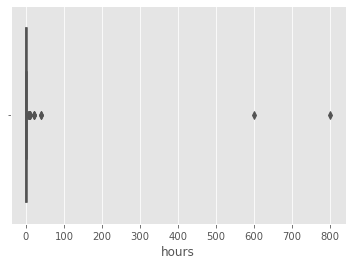

In [495]:
#Cursos
#En esta tabla, existe una variable cuantitativa (hours). Por lo que se puede analizar si existe algun outlier.
sns.boxplot(x=cursos['hours'])#se observan los valores en boxplot.
 #Utilizaremos la función Z-score definida en la biblioteca scipy para detectar los valores atípicos.
z = np.abs(stats.zscore(cursos['hours']))
print(z)

threshold = 3 #definir un umbral para identificar un valor atípico.
print(np.where(z > 3)) # existen dos filas que se identifican como outliers

#Las dos filas (25 y 50) identificadas como outliers, se observan y se ve que quizas se trata de un error debido a que tienen un
#cero de más.
cursos['hours'][25]#se observa el valor correspondiente
cursos['hours'][50]#se observa el valor correspondiente

cursos['hours'].replace({800: 80,600: 60}, inplace = True)#se quita un cero


In [500]:
#Programas
#En esta tabla, no se puede realizar la tecnica para identificar outlier puesto que no se cuenta con ninguna variable cuantitva.

In [499]:
#Cursos en programas
#En esta tabla, existe una variable cuantitativa (num_periodos). No tiene outliers ya que, como hemos observado en los estadisticos, los valores que toma son 0, 1, 2, o 3

In [502]:
#Itinerarios
#No hay variables cuantitativas

(array([ 363, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1836,
       2376, 3002, 3378, 3379, 3380, 3634, 3635, 3636, 3637, 3638, 3639,
       3640, 3641, 3642, 3648, 3649], dtype=int64),)


10.0

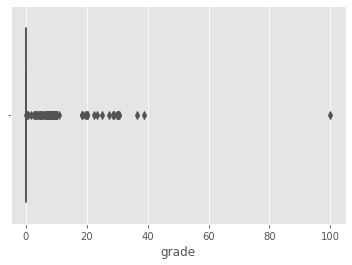

In [505]:
#Notas_cursos
notas_cursos.describe() #como hemos visto antes, los valores de grade superan el 10

sns.boxplot(x=notas_cursos['grade'])#se observan los valores en boxplot.
z = np.abs(stats.zscore(notas_cursos['grade']))

threshold = 3 #definir un umbral para identificar un valor atípico.
print(np.where(z > 3)) # existen 27 filas con umbral mayor que 3

#notas mayores que 10, se dividen por 10 y se obtiene la nota real
notas_cursos.loc[notas_cursos['grade'] > 10, 'grade'] = notas_cursos['grade']/10 #transformacion de la nota
notas_cursos['grade'].max()#se observa que el valor maximo es 10.

In [507]:
#Roles
#No hay variables cuantitativas

In [508]:
#Plantas
#No hay variables cuantitativas

In [ ]:
#Accesos
#No hay variables cuantitativas

In [513]:
#Acceso_1ero_ultimo
#No hay variables cuantitativas

(array([], dtype=int64),)


<ipython-input-518-4392e306ae68>:8: RuntimeWarning: invalid value encountered in greater
  print(np.where(z > 3)) #se observa que contamos con algunos outliers


10.0

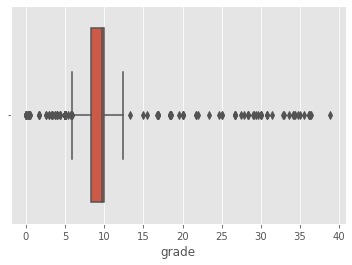

In [518]:
#Actividades
#tiene una variable cualitativa: grade
actividades.describe() #notas por encima de 10

sns.boxplot(x=actividades['grade'])#se observan los valores en boxplot.
z = np.abs(stats.zscore(actividades['grade']))
threshold = 3 #definir un umbral para identificar un valor atípico.
print(np.where(z > 3)) #se observa que contamos con algunos outliers

#notas mayores que 10, se dividen por 10 y se obtiene la nota real
actividades.loc[actividades['grade'] > 10, 'grade'] = actividades['grade']/10
actividades['grade'].max()#se observa que el valor maximo es 10.